# ENVIRONMENT

In [1]:
!pip install mlxtend

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

from mlxtend.frequent_patterns import association_rules, apriori, fpmax, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("precision", 3)
pd.set_option("display.max_colwidth", None)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings("ignore")

RANDOM_STATE = 1

original_df = pd.read_csv("./src/churn/teleco_market_basket.csv")
df = original_df.copy()

# Part 0: Data Exploration

In [3]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(15002, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [6]:
pd.DataFrame(df.isnull().sum(), columns=["# NaNs"])

,# NaNs
Item01,7501
Item02,9255
Item03,10613
Item04,11657
Item05,12473
Item06,13138
Item07,13633
Item08,14021
Item09,14348
Item10,14607


In [7]:
f"{df.isnull().sum().sum():,} Total NaN Cells"

'270,677 Total NaN Cells'

In [8]:
df.shape
df.head()

(15002, 20)

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Instantiate transaction encoder
encoder = TransactionEncoder().fit(original_df)
# pd.DataFrame(encoder)

# One-hot encode itemsets by applying fit and transform
onehot = encoder.transform(original_df)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
print(onehot)

# Computing support for single items
print(onehot.mean())

           0      1      2      3      4      5      6      7      8      9  \
0       True   True  False  False  False  False  False  False  False  False   
1       True  False   True  False  False  False  False  False  False  False   
2       True  False  False   True  False  False  False  False  False  False   
3       True  False  False  False   True  False  False  False  False  False   
4       True  False  False  False  False   True  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
14997  False  False  False  False  False  False  False  False  False  False   
14998  False  False  False  False  False  False  False  False  False  False   
14999  False  False  False  False  False  False  False  False  False  False   
15000  False  False  False  False  False  False  False  False  False  False   
15001  False  False  False  False  False  False  False  False  False  False   

           I      e      m      t  
0       True   

## Market Basket Analysis Examples

# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:

### 1.  Propose one question relevant to a real-world organizational situation that you will answer using market basket analysis.

Gibson Telecom wants to experiment with a customer rewards program to reduce churn, drive customer signups and gamify loyalty for customers. To show appreciation for a customer's loyalty, each year on a customer's birthday, Gibson would like to present several discounted tech item bundles for a customer to choose from. Additionally, Gibson will offer these bundles to new customers as a thank you for signing up. Gibson executives would like to know if analysts can mine customer transaction data to identify key product associations that can help develop product bundles. 


### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
The primary data analysis goal is to identify 3 product bundles of associated tech items that the marketing team can offer to existing customers on their birthday and new customers upon signup.

# Part II: Market Basket Justification

## B.  Explain the reasons for using market basket analysis by doing the following:

### 1.  Explain how market basket analyzes the selected dataset. Include expected outcomes.
Market Basket Analysis is an unsupervised learning association analysis technique that identifies patterns of items within a data set. This technique allows individuals to mine transaction data and uncover unexpected transaction patterns (Moffitt, 2017).

Market Basket Analysis analyzes the selected dataset by using the Apriori algorithm to mine the one-hot encoded customer transaction records to where all the items purchased together are represented in one row. The outcome of this analysis is a table of frequent item sets and association rules with antecedents and consequents (Raschka). 

Large transaction datasets will generate a large volume of frequent itemsets. Consequently, analysts will discover most of these itemsets and rules provide little actionable insight. As a result, it's important to reduce the rulesets by filtering the association rules. To filter the rulesets, we can use the mlxtend.apriori function's min_support parameter to control the ruleset's relative frequency threshold (Moffitt, 2017). This parameter filters out any frequent itemsets that occur together below a certain percentage of all transactions (Li, 2017).

The expected outcome of the apriori function is a data frame of the frequent itemsets and the support value for the itemset. The next step in the analysis is to generate rules with antecedents, consequents, and their corresponding support, confidence, and lift metrics (Moffitt, 2017).

Overall, the expected outcome of this analysis is to uncover frequent transaction patterns for Gibson Telecom customers. From there, Gibson's marketing team can use their intuition and the frequent itemsets to build discount for customer bundles.



### 2.  Provide one example of transactions in the dataset.

In [10]:
df.dropna(axis=0, how="all").reset_index(drop=True).head(1).T

,0
Item01,Logitech M510 Wireless mouse
Item02,HP 63 Ink
Item03,HP 65 ink
Item04,nonda USB C to USB Adapter
Item05,10ft iPHone Charger Cable
Item06,HP 902XL ink
Item07,Creative Pebble 2.0 Speakers
Item08,Cleaning Gel Universal Dust Cleaner
Item09,Micro Center 32GB Memory card
Item10,YUNSONG 3pack 6ft Nylon Lightning Cable


### 3.  Summarize one assumption of market basket analysis.
One assumption about market basket analysis is that the analysis requires that the data is in a specific format. For example, the data should be in a wide format where each row represents a single transaction and each column represents a unique item that may or may not have been in the transaction. Furthermore, the dataset should be 1-hot encoded to indicate if the item was in the transaction (Moffitt, 2017).        

# Part III: Data Preparation and Analysis

## C.  Prepare and perform market basket analysis by doing the following:

### 1.  Transform the dataset to make it suitable for market basket analysis. Include a copy of the cleaned dataset.

#### Data Prep - find rows that are all Null

In [11]:
df = original_df.copy()

# trim all strings
df = df.select_dtypes(["object"]).applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)

# Remove rows with all missing values.
df = df.dropna(axis=0, how="all")

# Remove columns with all missing values.
df = df.dropna(axis=1, how="all")

# convert row of columns to list of items
transactions = df.T.apply(lambda x: x.dropna().tolist()).tolist()

In [12]:
transactions[:2]

df.shape

[['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses'],
 ['Apple Lightning to Digital AV Adapter',
  'TP-Link AC1750 Smart WiFi Router',
  'Apple Pencil']]

(7501, 20)

#### One-Hot Encode Itemsets

In [13]:
# Instantiate transaction encoder and one-hot encode itemsets
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot

# Convert one-hot encoded data to DataFrame with 0's and 1's
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_).replace({True: 1, False: 0})

array([[ True, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
onehot_df.head()

# cleaned data for analysis should be 7501 rows and 119 columns or items
onehot_df.shape

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,Apple Lightning to USB cable,Apple Magic Mouse 2,Apple Pencil,Apple Pencil 2nd Gen,Apple Power Adapter Extension Cable,Apple USB-C Charger cable,AutoFocus 1080p Webcam,BENGOO G90000 headset,Blue Light Blocking Glasses,Blue Light Blocking Glasses 2pack,Brother Genuine High Yield Toner Cartridge,Cat 6 Ethernet Cable 50ft,Cat8 Ethernet Cable,CicTsing MM057 2.4G Wireless Mouse,Cleaning Gel Universal Dust Cleaner,Creative Pebble 2.0 Speakers,DisplayPort ot HDMI adapter,Dust-Off Compressed Gas,Dust-Off Compressed Gas 2 pack,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses,Falcon Dust Off Compressed Gas,HOVAMP Mfi 6pack Lightning Cable,HOVAMP iPhone charger,HP 61 2 pack ink,HP 61 Tri-color ink,HP 61 ink,HP 62XL Tri-Color ink,HP 62XL ink,HP 63 Ink,HP 63 Tri-color ink,HP 63XL Ink,HP 63XL Tri-color ink,HP 64 Tri-Color ink,HP 64 ink,HP 65 ink,HP 902XL ink,HP 952 ink,HP ENVY 5055 printer,HP952XL ink,...,Premium Nylon USB Cable,RUNMUS Gaming Headset,SAMSUNG 128GB card,SAMSUNG 256 GB card,SAMSUNG EVO 32GB card,SAMSUNG EVO 64GB card,Sabrent 4-port USB 3.0 hub,SanDisk 128GB Ultra microSDXC card,SanDisk 128GB card,SanDisk 128GB microSDXC card,SanDisk 32GB Ultra SDHC card,SanDisk 32GB card,SanDisk Extreme 128GB card,SanDisk Extreme 256GB card,SanDisk Extreme 32GB 2pack card,SanDisk Extreme Pro 128GB card,SanDisk Extreme Pro 64GB card,SanDisk Ultra 128GB card,SanDisk Ultra 256GB card,SanDisk Ultra 400GB card,SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit,Stylus Pen for iPad,Syntech USB C to USB Adapter,TONOR USB Gaming Microphone,TP-Link AC1750 Smart WiFi Router,TP-Link AC4000 WiFi router,TopMate C5 Laptop Cooler pad,UNEN Mfi Certified 5-pack Lightning Cable,USB 2.0 Printer cable,USB C to USB Male Adapter,USB Type C Cable,USB Type C to USB-A Charger cable,VIVO Dual LCD Monitor Desk mount,VicTsing Mouse Pad,VicTsing Wireless mouse,Vsco 70 pack stickers,Webcam with Microphone,XPOWER A-2 Air Pump blower,YUNSONG 3pack 6ft Nylon Lightning Cable,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(7501, 119)

#### Output Prepared Dataset

In [15]:
onehot_df.to_csv("./teleco_market_basket_prepared.csv", index=False)


### 2.  Execute the code used to generate association rules with the Apriori algorithm. Provide screenshots that demonstrate the error-free functionality of the code.

Reduce the computational complexity of frequent itemset generation. The Apriori principle, is an effective way to eliminate some of the candidate itemsets without counting their support values.

Apriori Principle: if an itemset is frequent, then all of its subsets must also be frequent. Conversely, if an itemset such as {a, b} is infrequent, then all of its supersets must be infrequent too.

The entire subgraph containing the supersets of {a, b} can be pruned immediately once {a, b} is found to be infrequent. This strategy of trimming the exponential search space based on the support measure is known as support-based pruning. Such a pruning strategy is made possible by a key property of the support measure, namely, that the support for an itemset never exceeds the support for its subsets. This property is also known as the anti-monotone property of the support measure.


In [16]:
# Compute frequent itemsets that have a support of at least 1% using the Apriori algorithm
frequent_itemsets = apriori(
    onehot_df, min_support=0.01, max_len=None, use_colnames=True
).sort_values(by="support", ascending=False)

frequent_itemsets["# antecedents"] = frequent_itemsets["itemsets"].apply(
    lambda x: len(x)
)
frequent_itemsets

,support,itemsets,# antecedents
18,0.24,(Dust-Off Compressed Gas 2 pack),1
8,0.18,(Apple Pencil),1
66,0.17,(VIVO Dual LCD Monitor Desk mount),1
63,0.17,(USB 2.0 Printer cable),1
23,0.16,(HP 61 ink),1
...,...,...,...
166,0.01,"(iPhone Charger Cable Anker 6ft, Dust-Off Compressed Gas 2 pack)",2
241,0.01,"(Dust-Off Compressed Gas 2 pack, Apple Pencil, SanDisk Ultra 64GB card)",3
208,0.01,"(Nylon Braided Lightning to USB cable, TopMate C5 Laptop Cooler pad)",2
255,0.01,"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD Monitor Desk mount, USB 2.0 Printer cable)",3


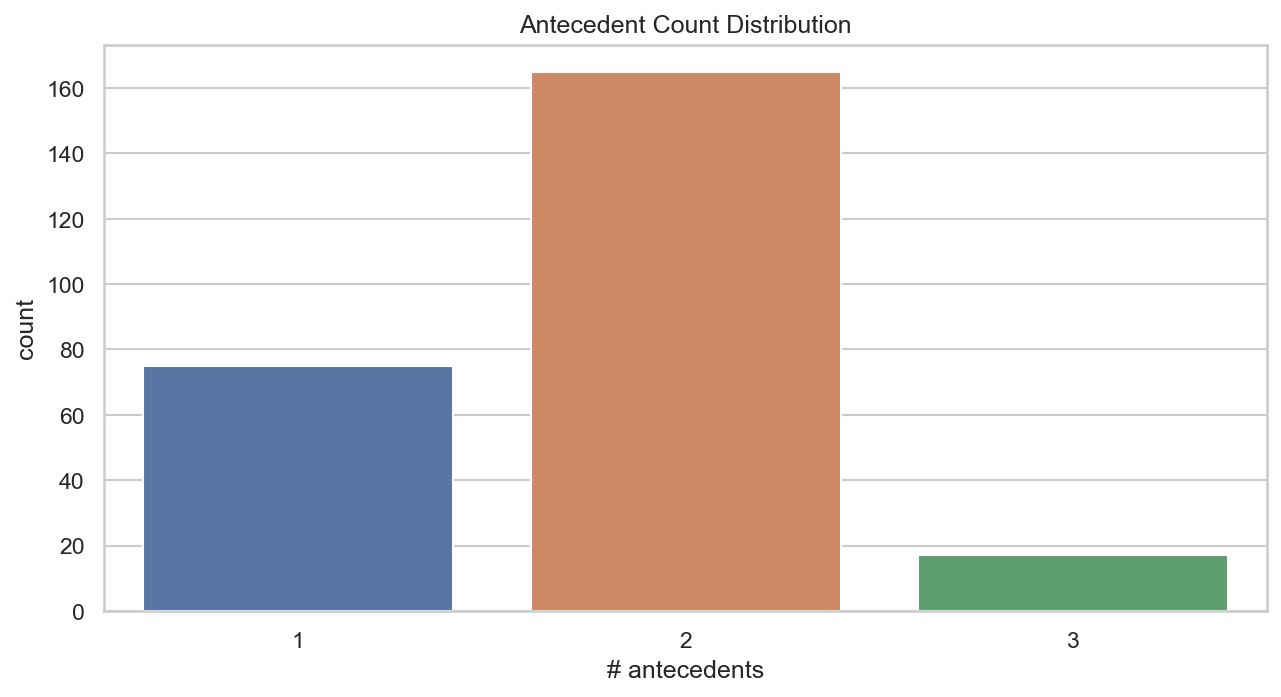

In [17]:
ax = plt.subplots(figsize=(10, 5))
_ = sns.countplot(
    data=frequent_itemsets,
    x="# antecedents",
).set(title="Antecedent Count Distribution")
plt.show()

[Text(0.5, 1.0, 'Support Distribution')]

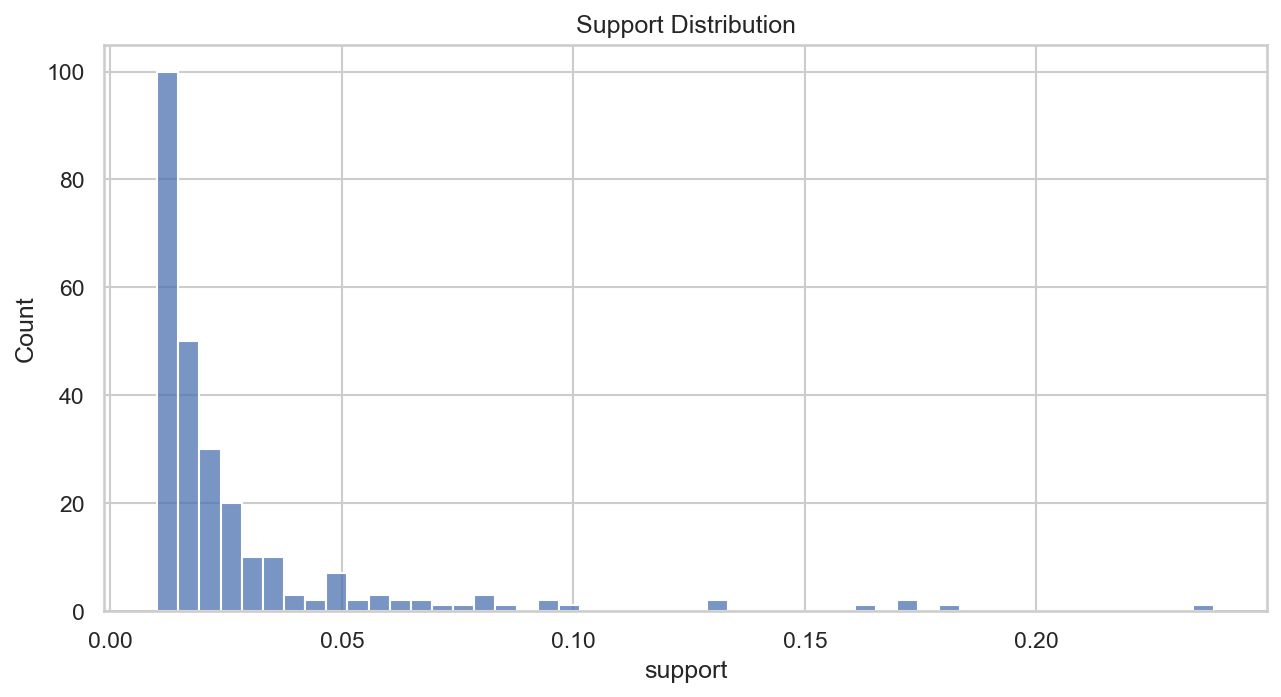

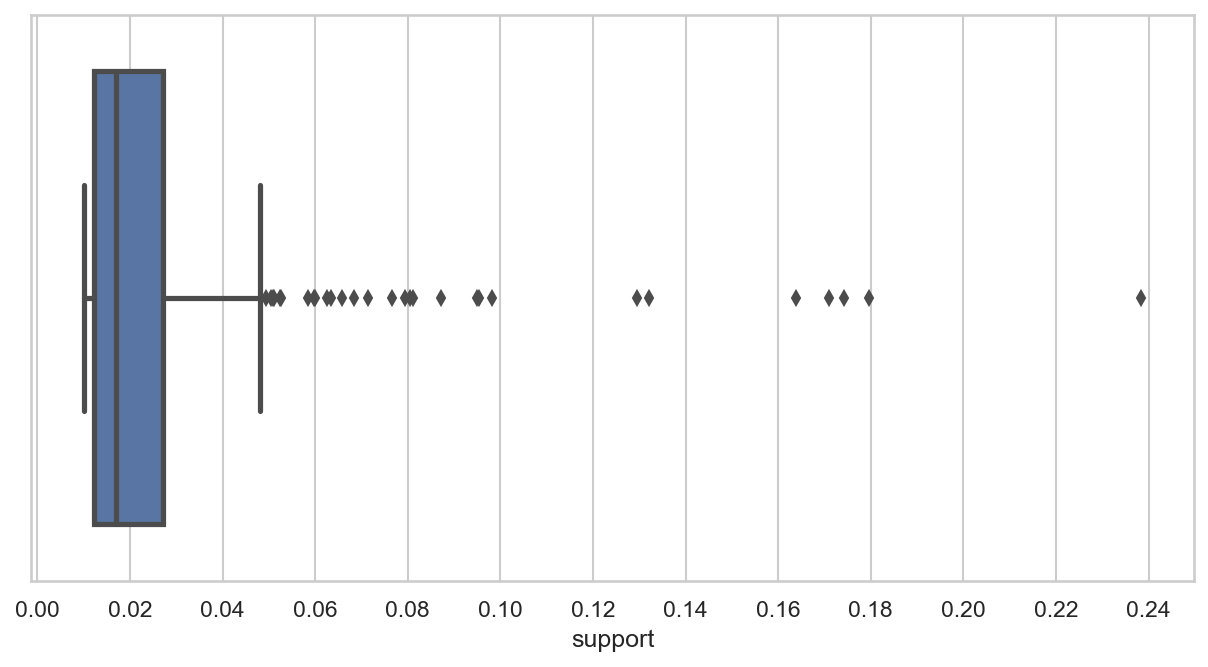

In [18]:
_ = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=frequent_itemsets, x="support")
ax.set(title="Support Distribution")
plt.show()

_ = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=frequent_itemsets, x="support")
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.02))
plt.show()


### 3.  Provide values for the support, lift, and confidence of the association rules table.

#### Frequent Individual Items

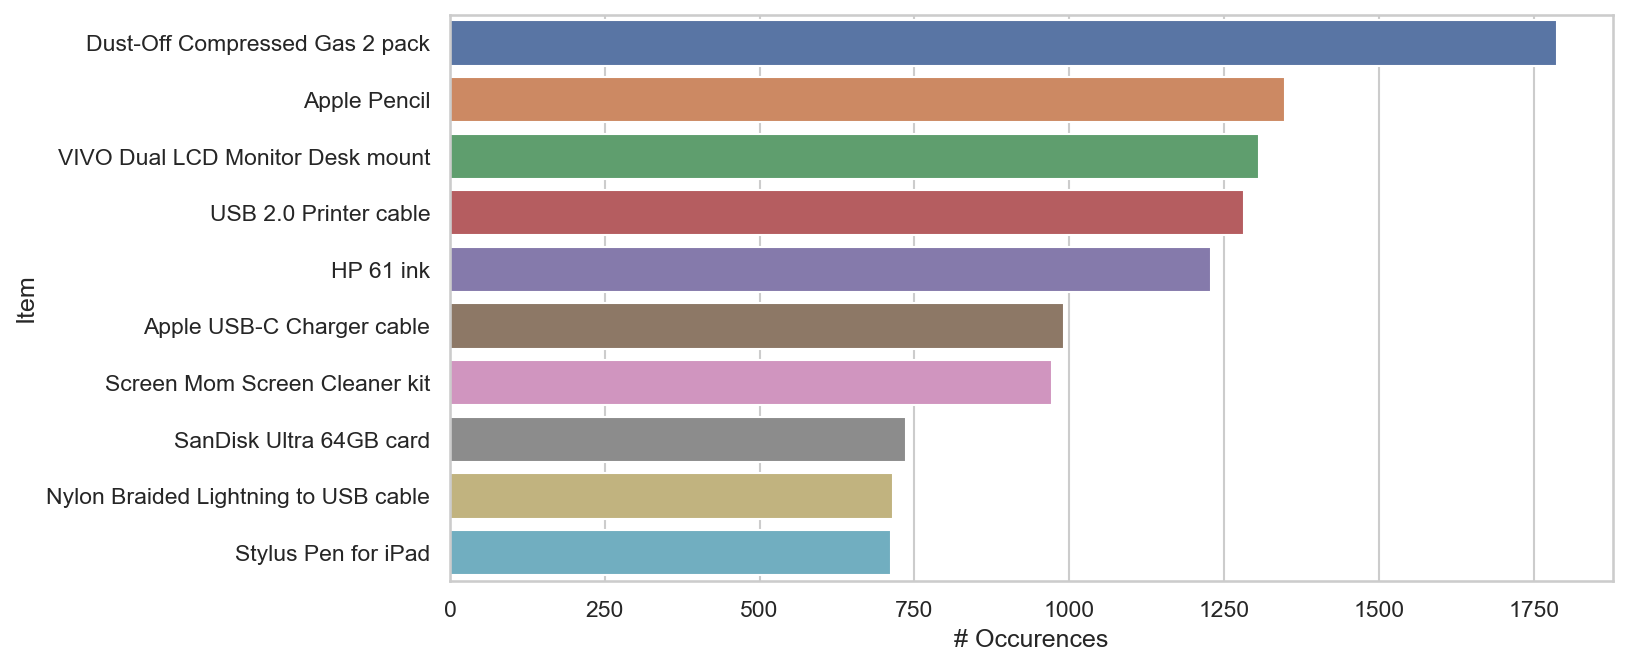

In [19]:
common_df = (
    pd.DataFrame(onehot_df.sum(), columns=["# Occurences"])
    .sort_values(by="# Occurences", ascending=False)
    .rename_axis("Item")
    .reset_index()
)

_ = plt.subplots(figsize=(10, 5))
_ = sns.barplot(data=common_df[:10], x="# Occurences", y="Item")
plt.show()

#### Compute all association rules
An association rule is an implication expression of the form X -> Y , where X and Y are disjoint itemsets

- The strength of an association rule can be measured in terms of its support and confidence.
    - Support determines how often a rule is applicable to a given data set
    - Confidence determines how frequently items in Y appear in transactions that contain X.

In [20]:
association_rules(frequent_itemsets, min_threshold=0.05).sort_values(
    by=["support", "antecedents"], ascending=False
).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.17,0.24,0.06,0.34,1.44,0.02,1.16
1,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.24,0.17,0.06,0.25,1.44,0.02,1.10
2,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.16,0.24,0.05,0.32,1.35,0.01,1.12
3,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.24,0.16,0.05,0.22,1.35,0.01,1.07
4,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.18,0.24,0.05,0.28,1.19,0.01,1.06
...,...,...,...,...,...,...,...,...,...
417,(VIVO Dual LCD Monitor Desk mount),"(Dust-Off Compressed Gas 2 pack, USB 2.0 Printer cable)",0.17,0.03,0.01,0.06,1.73,0.00,1.03
418,"(Dust-Off Compressed Gas 2 pack, SanDisk Ultra 64GB card)",(Apple Pencil),0.04,0.18,0.01,0.25,1.38,0.00,1.09
419,"(Dust-Off Compressed Gas 2 pack, USB 2.0 Printer cable)",(VIVO Dual LCD Monitor Desk mount),0.03,0.17,0.01,0.30,1.73,0.00,1.18
420,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.51,2.13,0.01,1.54


In [21]:
rules = (
    association_rules(frequent_itemsets, min_threshold=0.1)
    .sort_values(by=["confidence", "support", "antecedents"], ascending=False)
    .reset_index(drop=True)
)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.51,2.13,0.01,1.54
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.50,2.11,0.01,1.53
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.99,0.01,1.45
3,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.97,0.01,1.43
4,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.05,0.24,0.02,0.46,1.91,0.01,1.40
...,...,...,...,...,...,...,...,...,...
315,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.24,0.09,0.02,0.10,1.17,0.00,1.02
316,(Screen Mom Screen Cleaner kit),(TopMate C5 Laptop Cooler pad),0.13,0.08,0.01,0.10,1.33,0.00,1.03
317,(Screen Mom Screen Cleaner kit),"(Dust-Off Compressed Gas 2 pack, Apple Pencil)",0.13,0.05,0.01,0.10,1.98,0.01,1.06
318,(Dust-Off Compressed Gas 2 pack),(TopMate C5 Laptop Cooler pad),0.24,0.08,0.02,0.10,1.32,0.01,1.03


#### Rules: Support Plots

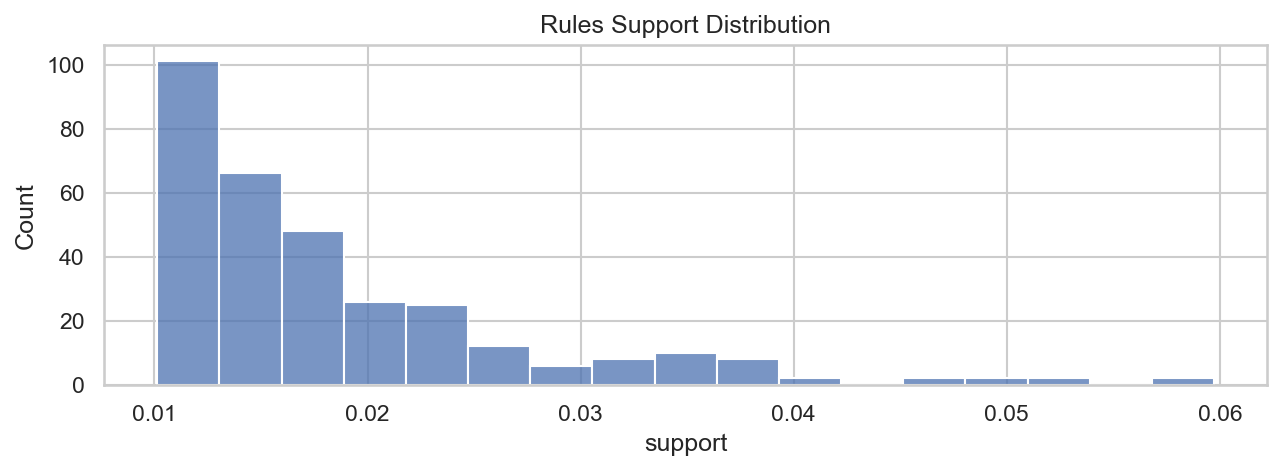

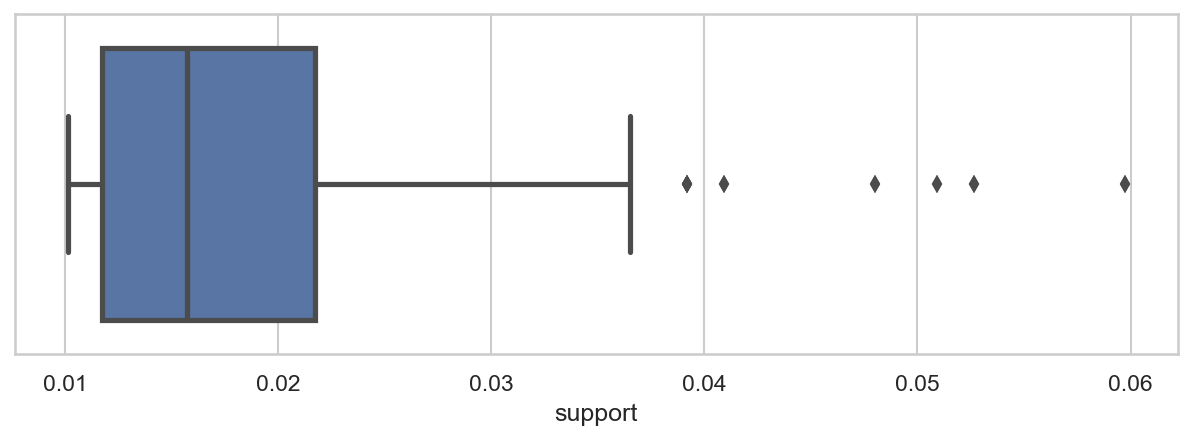

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.24,0.17,0.06,0.25,1.44,0.02,1.10
35,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.17,0.24,0.06,0.34,1.44,0.02,1.16
130,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.24,0.16,0.05,0.22,1.35,0.01,1.07


In [22]:
metric = "support"
_ = plt.subplots(figsize=(10, 3))
_ = sns.histplot(data=rules, x=metric).set(title=f"Rules {metric.title()} Distribution")

_ = plt.subplots(figsize=(10, 3))
_ = sns.boxplot(data=rules, x=metric)
plt.show()

rules.sort_values(by=metric, ascending=False)[:3]

#### Confidence Plots

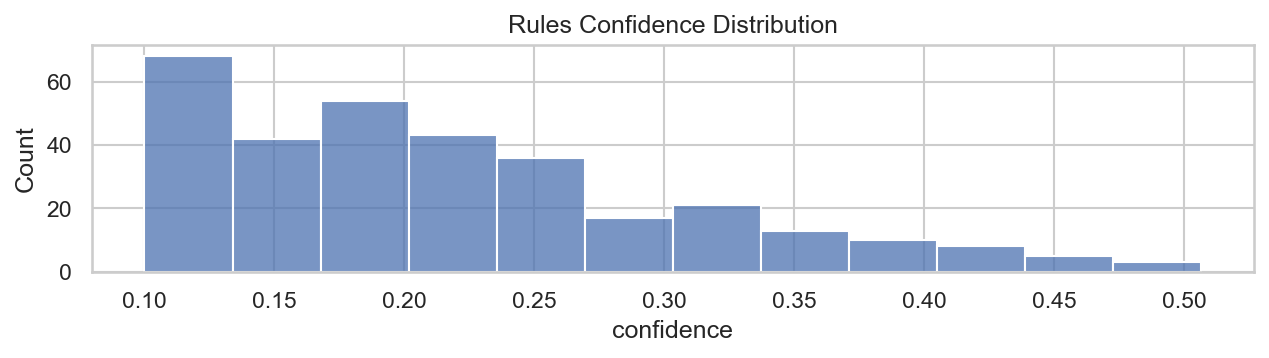

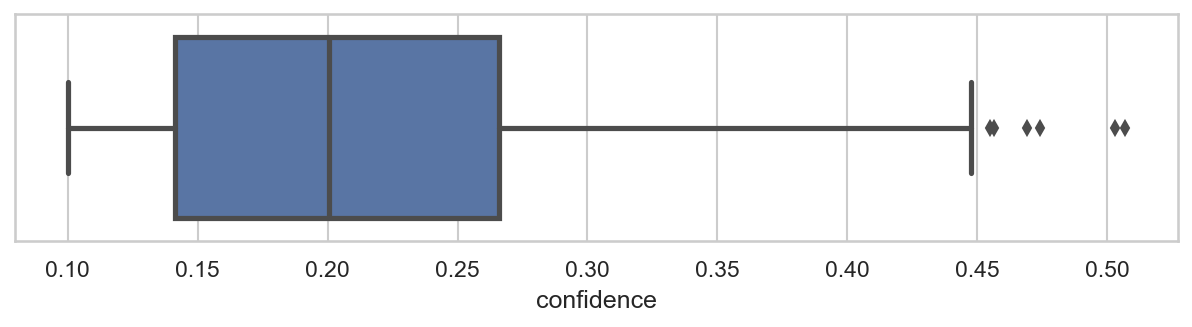

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.51,2.13,0.01,1.54
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.50,2.11,0.01,1.53
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.99,0.01,1.45


In [23]:
metric = "confidence"
_ = plt.subplots(figsize=(10, 2))
_ = sns.histplot(data=rules, x=metric).set(title=f"Rules {metric.title()} Distribution")

_ = plt.subplots(figsize=(10, 2))
_ = sns.boxplot(data=rules, x=metric)
plt.show()

rules.sort_values(by=metric, ascending=False)[:3]

#### Lift Plots

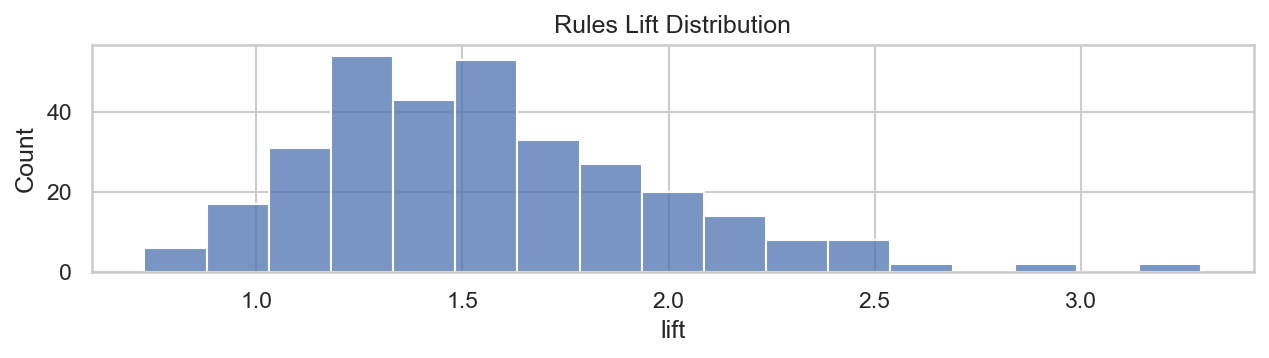

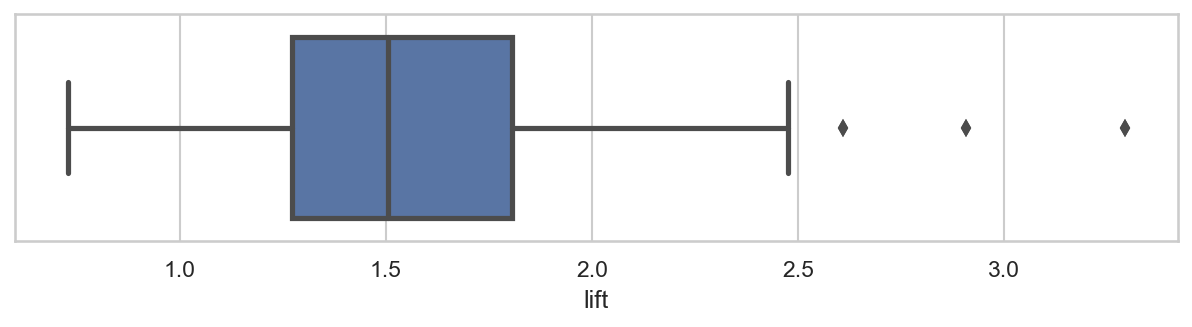

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(SanDisk 128GB Ultra microSDXC card),(SanDisk Ultra 64GB card),0.05,0.10,0.02,0.32,3.29,0.01,1.33
216,(SanDisk Ultra 64GB card),(SanDisk 128GB Ultra microSDXC card),0.10,0.05,0.02,0.16,3.29,0.01,1.14
196,(SanDisk Ultra 64GB card),"(Dust-Off Compressed Gas 2 pack, VIVO Dual LCD Monitor Desk mount)",0.10,0.06,0.02,0.17,2.91,0.01,1.14


In [24]:
metric = "lift"
_ = plt.subplots(figsize=(10, 2))
_ = sns.histplot(data=rules, x=metric).set(title=f"Rules {metric.title()} Distribution")

_ = plt.subplots(figsize=(10, 2))
_ = sns.boxplot(data=rules, x=metric)
plt.show()

rules.sort_values(by=metric, ascending=False)[:3]

#### Frequent Antecedent Groups

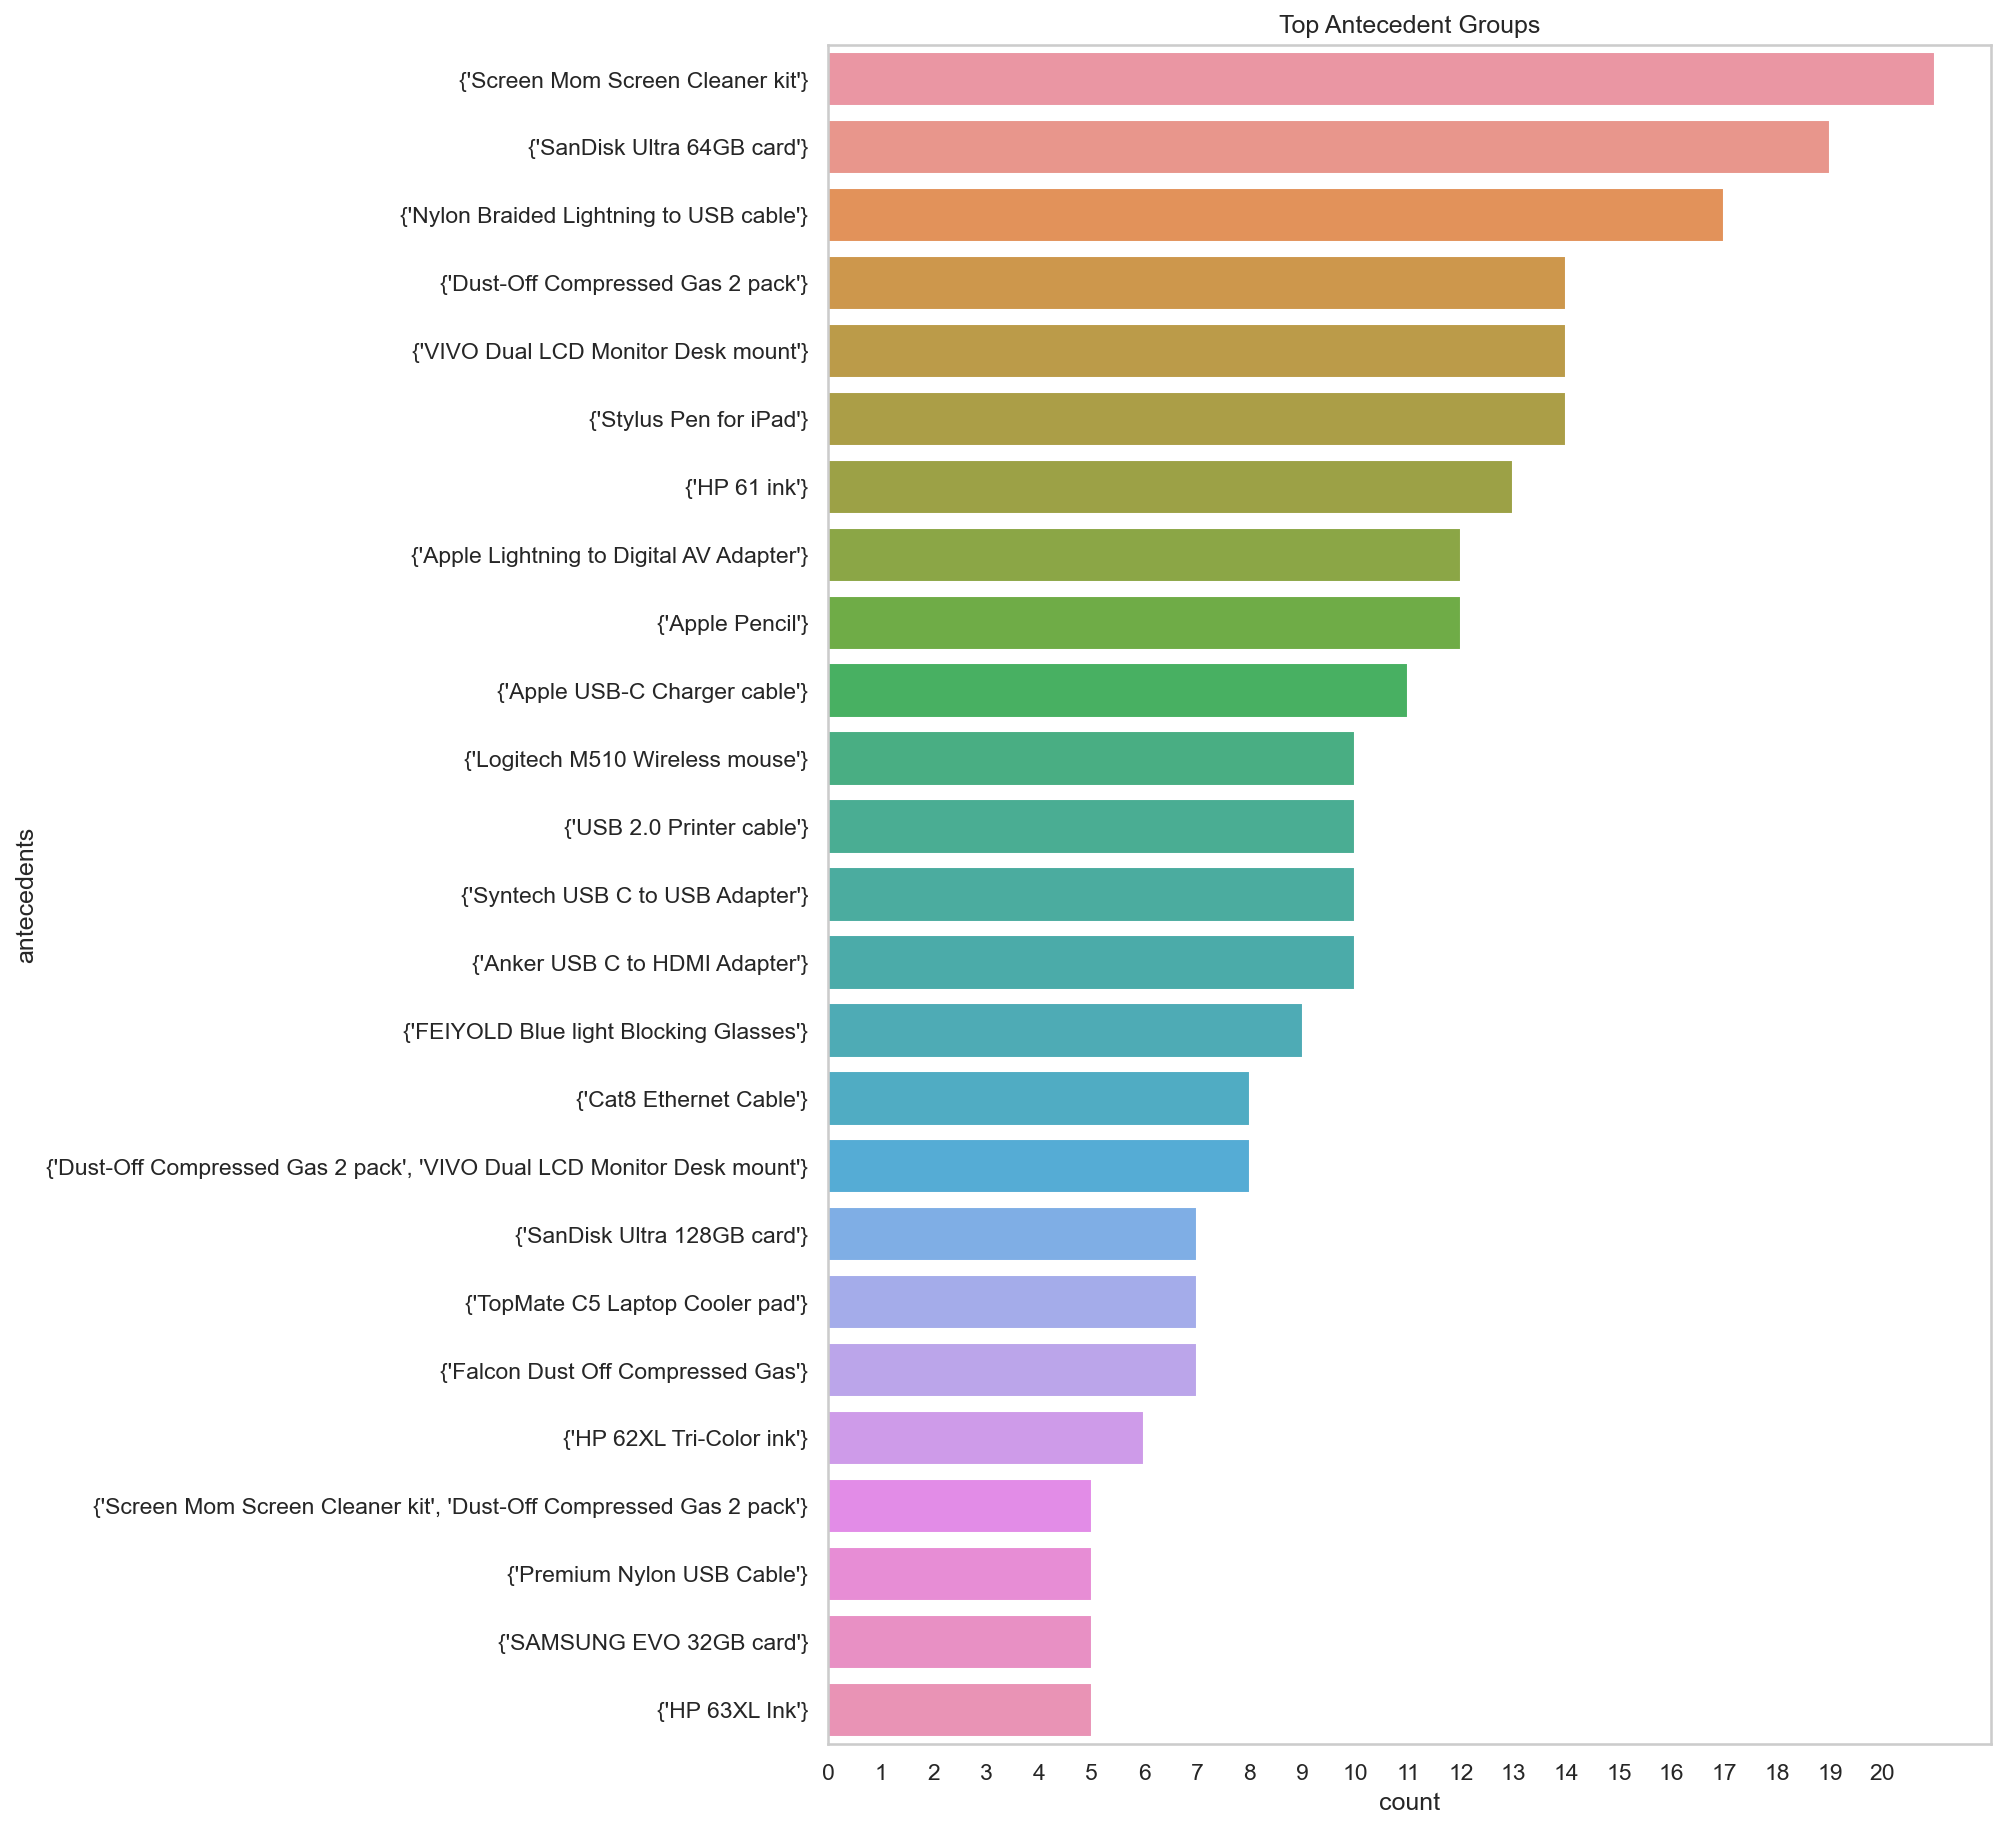

In [25]:
_ = plt.subplots(figsize=(10, 15))

count_df = pd.DataFrame(rules["antecedents"].apply(set).apply(str))

ax = sns.countplot(
    data=count_df,
    y="antecedents",
    order=count_df.antecedents.value_counts().iloc[:25].index,
)
ax.grid(False)

_ = ax.set(title="Top Antecedent Groups")
_ = ax.set_xticks(range(0, count_df.antecedents.value_counts().max()))
plt.show()

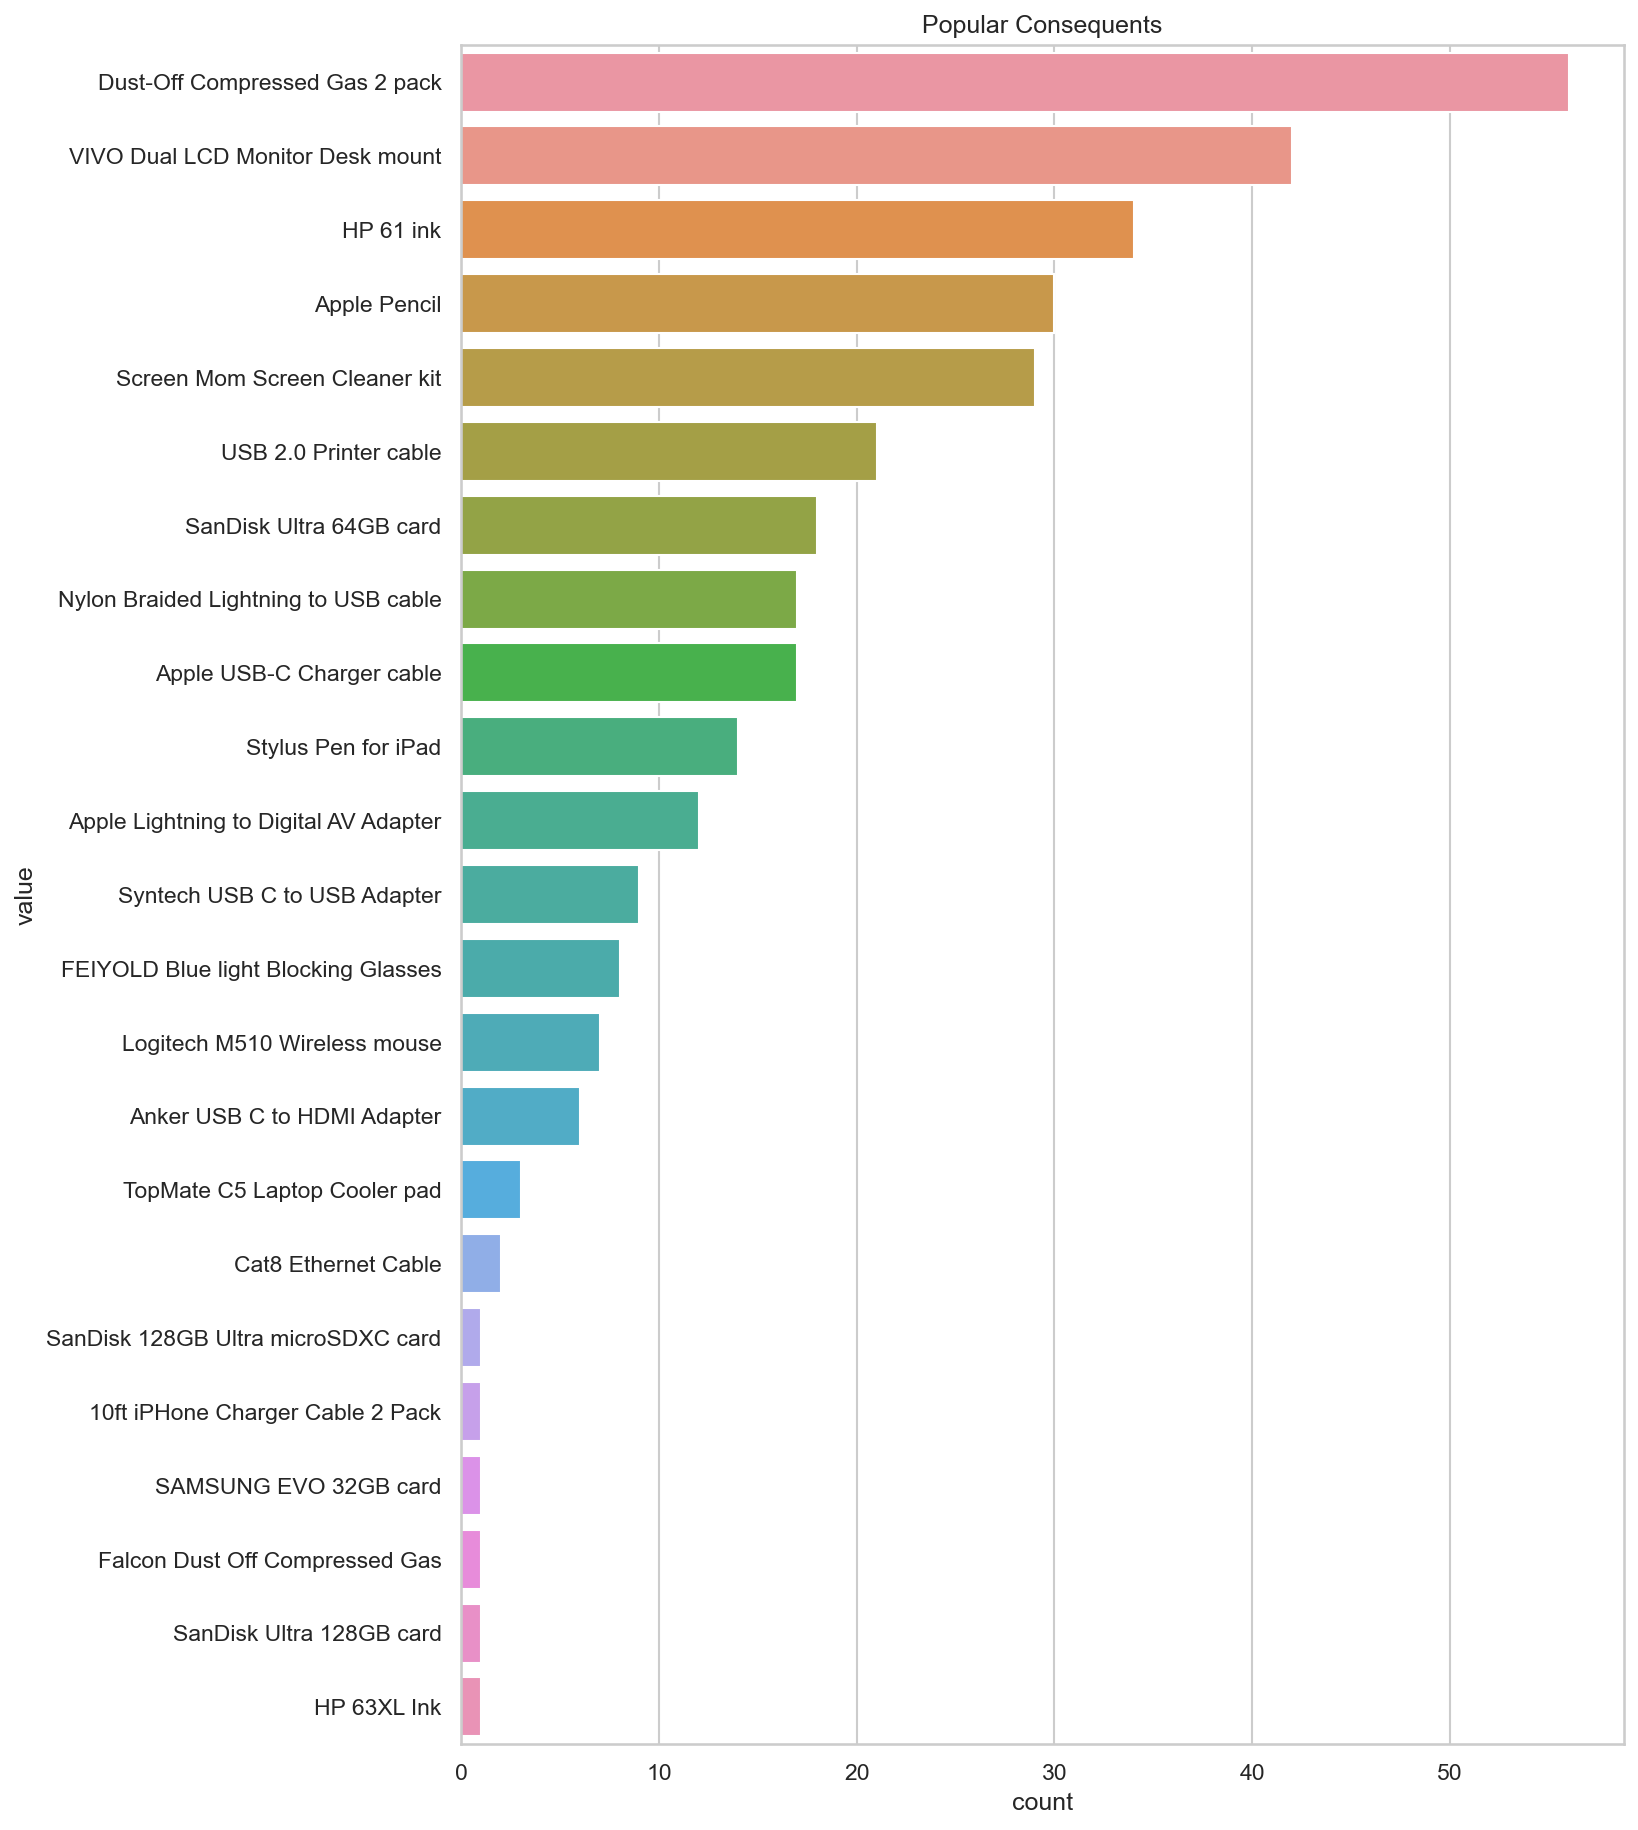

In [26]:
_ = plt.subplots(figsize=(10, 15))
count_df = (
    pd.DataFrame(rules["consequents"].to_list(), columns=["con1", "con2"])
    .melt()
    .drop(columns=["variable"])
)
_ = sns.countplot(
    y="value", data=count_df, order=count_df.value.value_counts().index
).set(title="Popular Consequents")
plt.show()

#### Popular Individual Antecedents

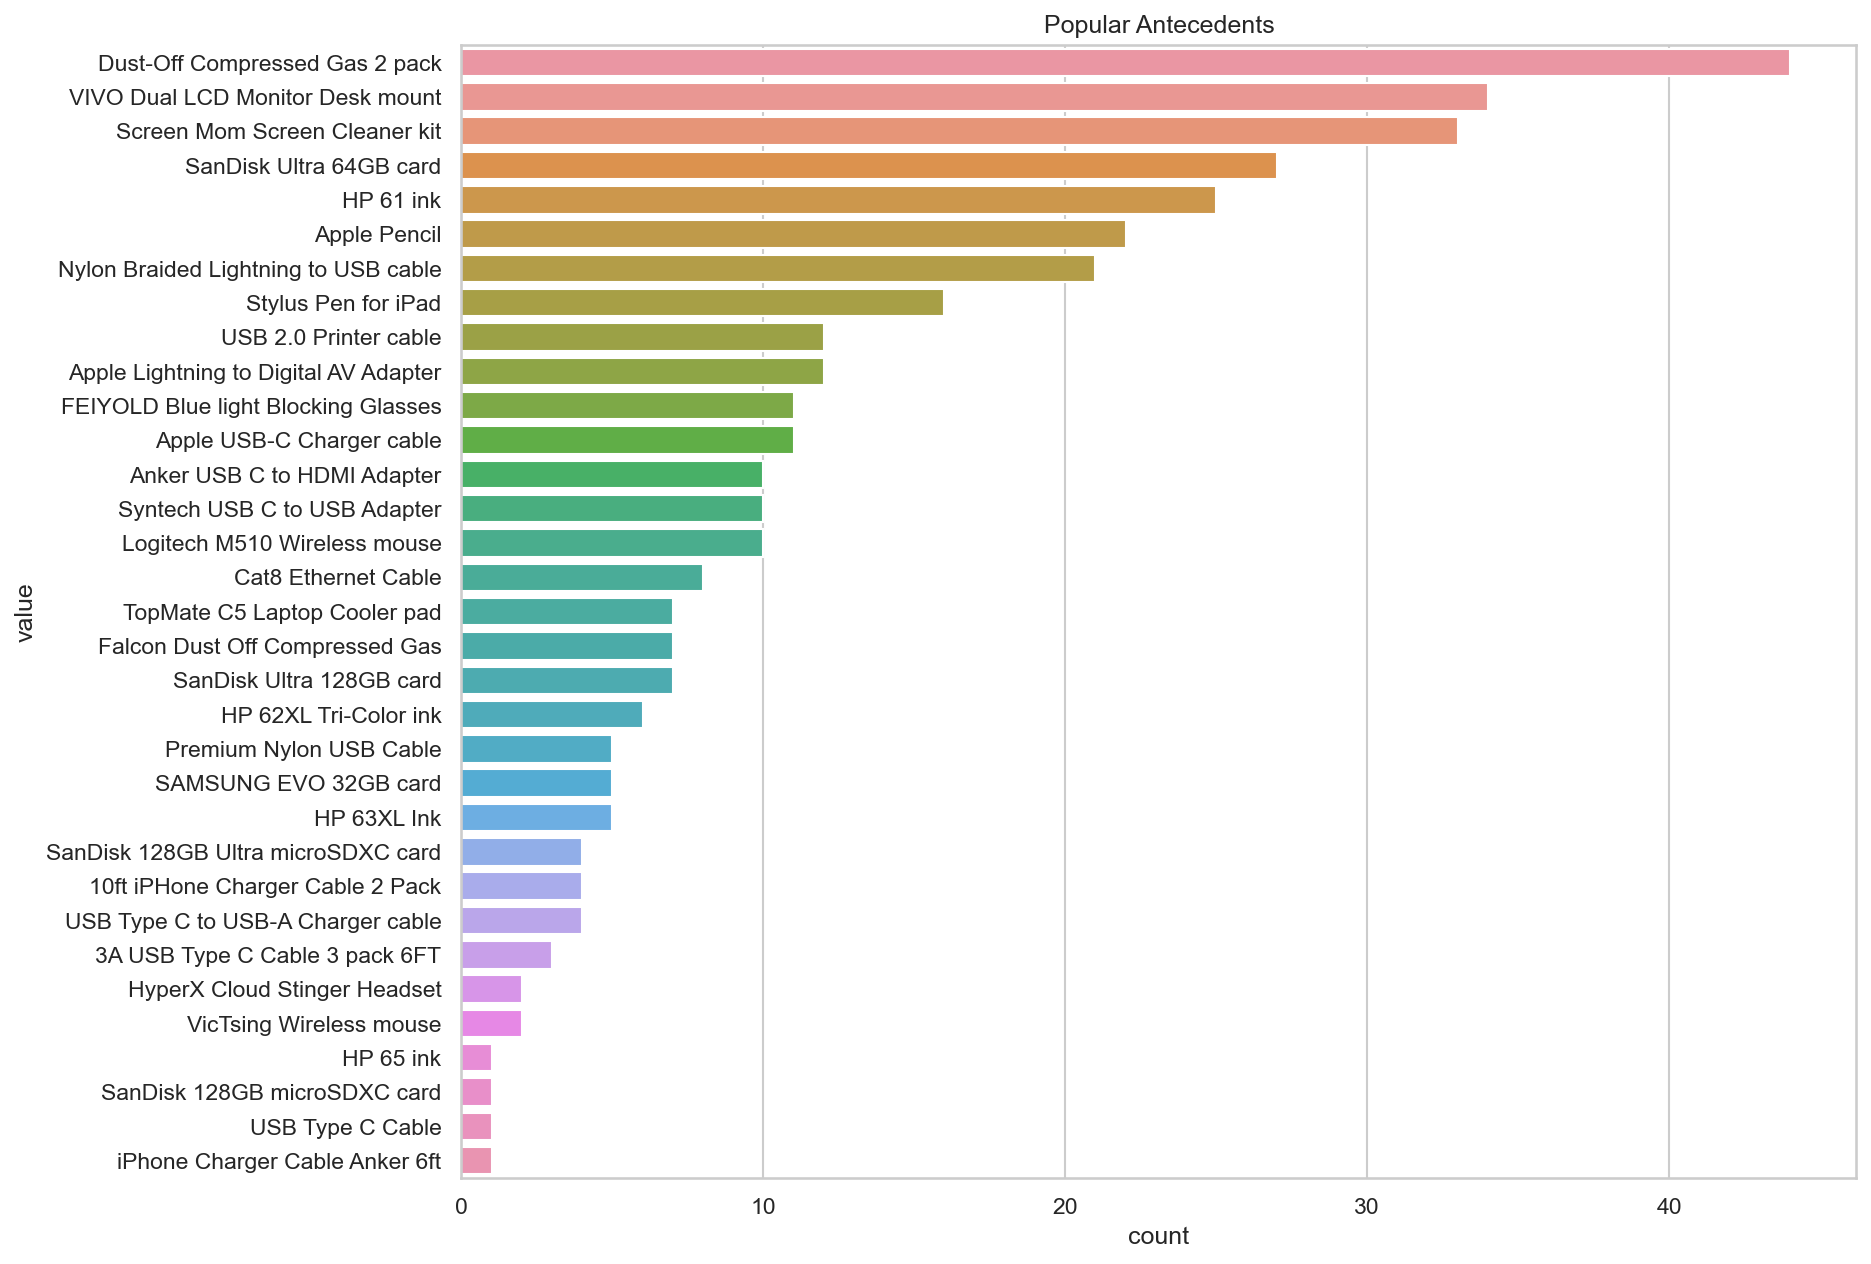

value                           
Dust-Off Compressed Gas 2 pack      44
VIVO Dual LCD Monitor Desk mount    34
Screen Mom Screen Cleaner kit       33
SanDisk Ultra 64GB card             27
HP 61 ink                           25
dtype: int64

In [27]:
count_df = (
    pd.DataFrame(rules["antecedents"].to_list(), columns=["ant1", "ant2"])
    .melt()
    .drop(columns=["variable"])
)

_ = sns.countplot(
    y="value", data=count_df, order=count_df.value.value_counts().index
).set(title="Popular Antecedents")
plt.show()

count_df.value_counts().head(5)

#### Popular Individual Consequents

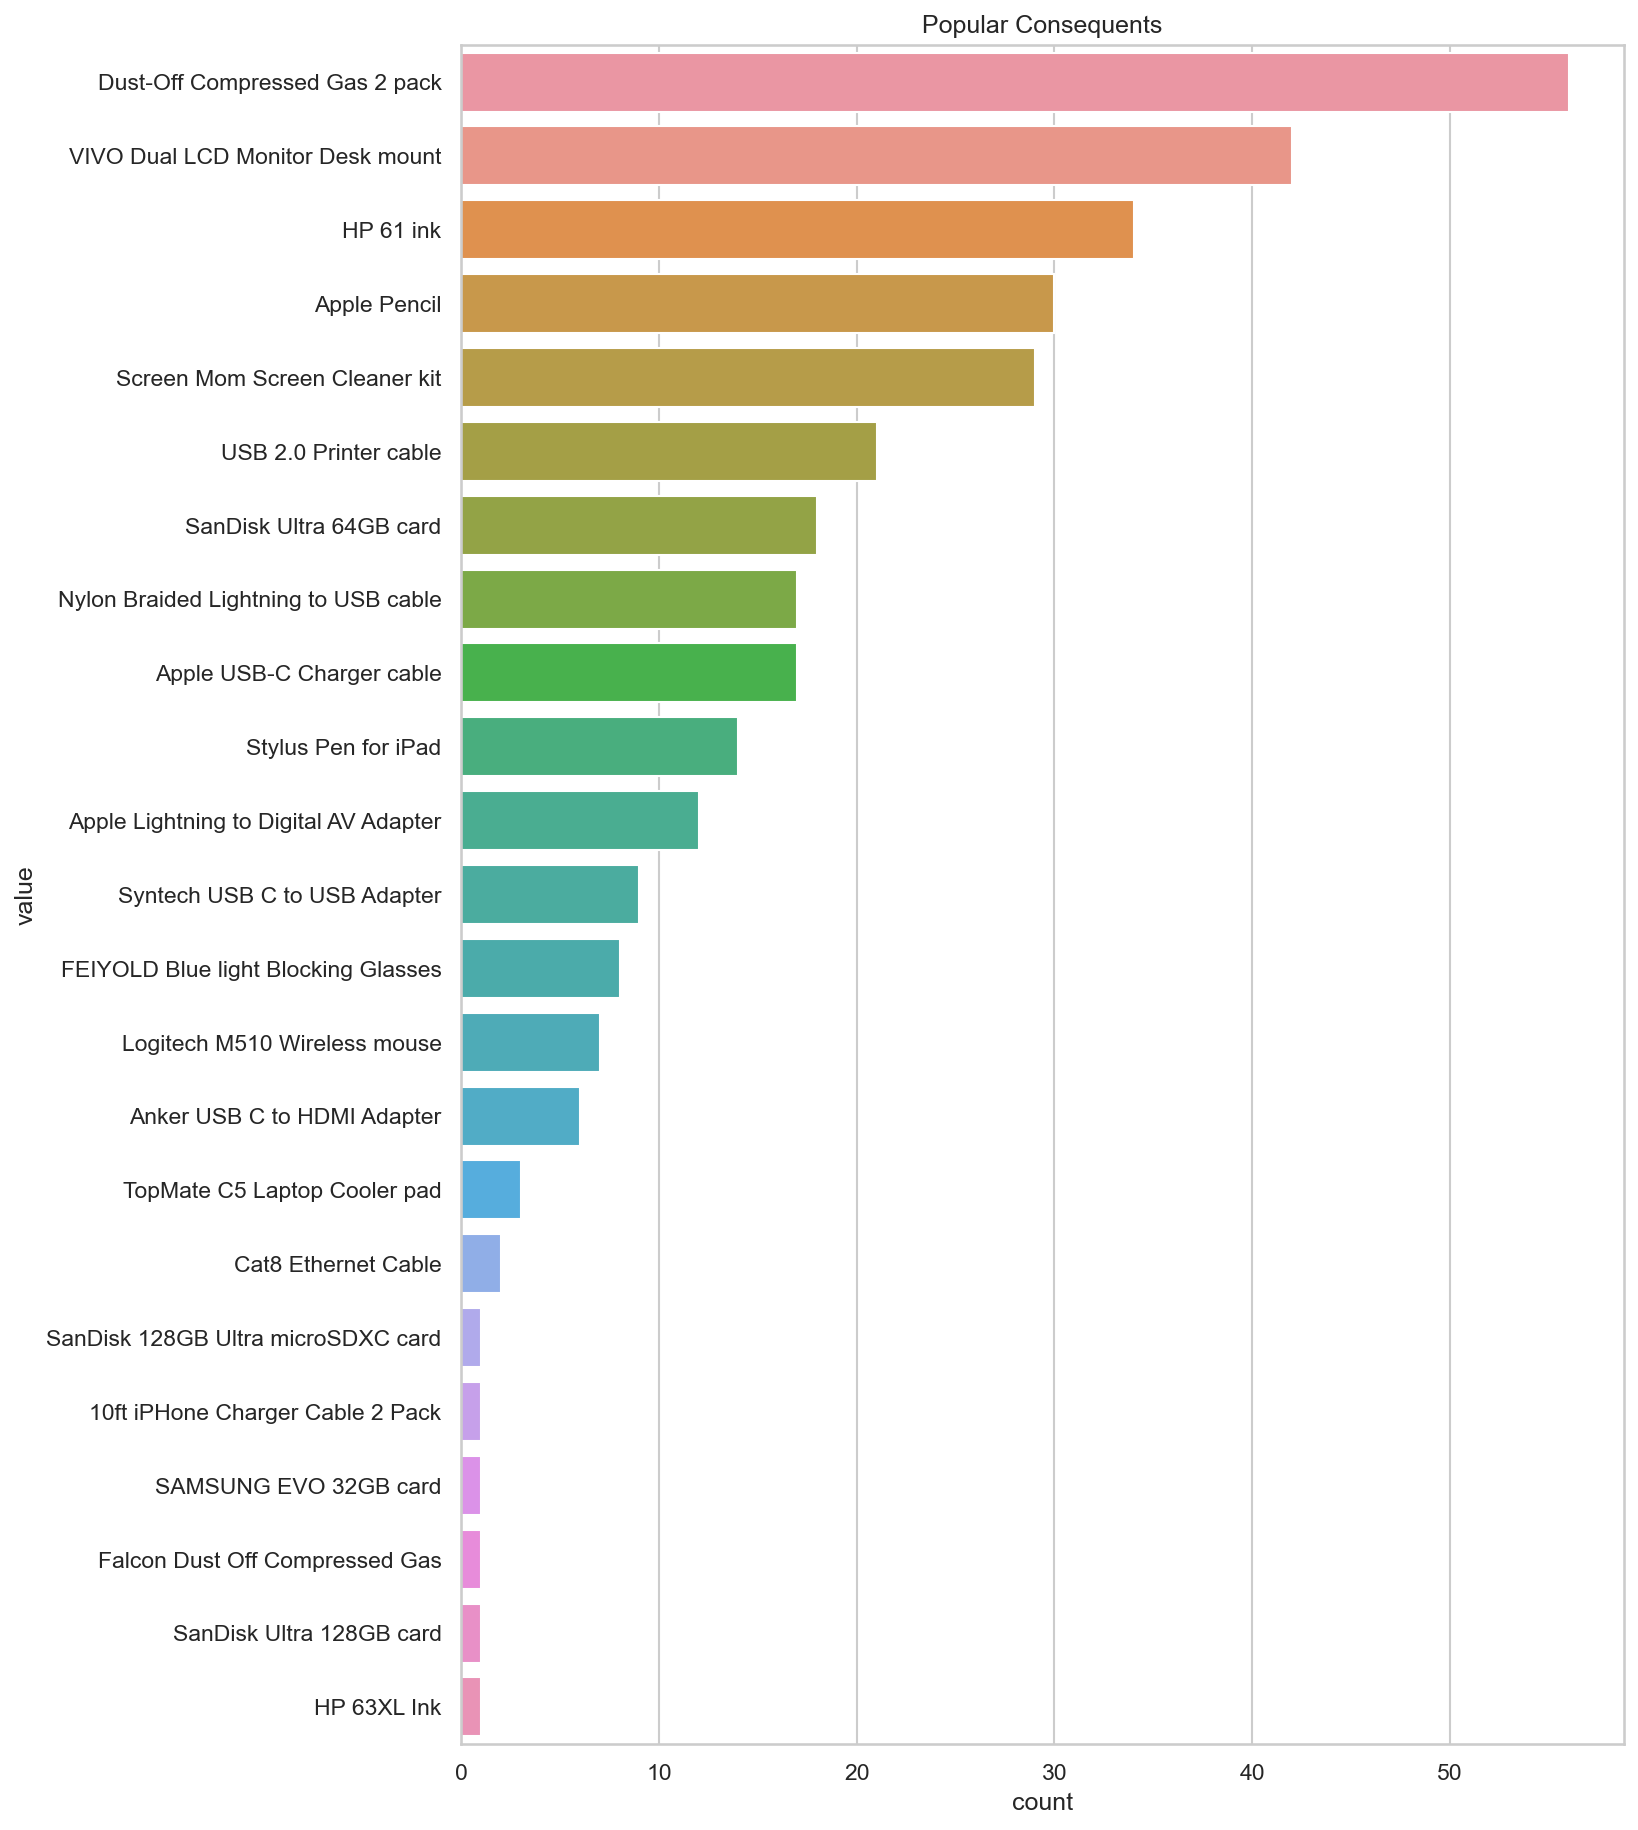

value                           
Dust-Off Compressed Gas 2 pack      56
VIVO Dual LCD Monitor Desk mount    42
HP 61 ink                           34
Apple Pencil                        30
Screen Mom Screen Cleaner kit       29
dtype: int64

In [28]:
_ = plt.subplots(figsize=(10, 15))
count_df = (
    pd.DataFrame(rules["consequents"].to_list(), columns=["con1", "con2"])
    .melt()
    .drop(columns=["variable"])
)
_ = sns.countplot(
    y="value", data=count_df, order=count_df.value.value_counts().index
).set(title="Popular Consequents")
plt.show()
count_df.value_counts().head(5)

### 4.  Identify the top three rules generated by the Apriori algorithm. Include a screenshot of the top rules along with their summaries.
Extract all the high confidence rules from the frequent itemsets found in the previous step. These rules are called strong rules.

In [29]:
rules[
    rules.columns.drop(
        ["antecedent support", "consequent support", "conviction", "leverage"]
    )
][:3]

,antecedents,consequents,support,confidence,lift
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.01,0.51,2.13
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.01,0.50,2.11
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.01,0.47,1.99


#### Consequents: Dust-Off Compressed Gas 2 pack

In [30]:
itemset = {"Dust-Off Compressed Gas 2 pack"}
rules[rules.consequents == itemset].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.51,2.13,0.01,1.54
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.50,2.11,0.01,1.53
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.99,0.01,1.45
3,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.97,0.01,1.43
4,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.05,0.24,0.02,0.46,1.91,0.01,1.40
5,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen for iPad)",(Dust-Off Compressed Gas 2 pack),0.03,0.24,0.01,0.46,1.91,0.01,1.40
6,"(VIVO Dual LCD Monitor Desk mount, FEIYOLD Blue light Blocking Glasses)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.45,1.88,0.00,1.38
7,"(Screen Mom Screen Cleaner kit, VIVO Dual LCD Monitor Desk mount)",(Dust-Off Compressed Gas 2 pack),0.04,0.24,0.02,0.44,1.86,0.01,1.37
8,"(Screen Mom Screen Cleaner kit, HP 61 ink)",(Dust-Off Compressed Gas 2 pack),0.03,0.24,0.01,0.44,1.83,0.01,1.35
9,"(VIVO Dual LCD Monitor Desk mount, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.04,0.24,0.02,0.44,1.83,0.01,1.35



# Part IV: Data Summary and Implications

## D.  Summarize your data analysis by doing the following:
### 1.  Summarize the significance of support, lift, and confidence from the results of the analysis.

#### Support
The Support from the analysis results is significant because it represents the relative frequency of an itemset within a dataset. We can view the support metric as a representation of an association rule's strength (Tan et al., 2019).  Support values range from 0 to 1; a rule with a low support value may indicate a chance occurrence (Tan et al., 2019).

Our analysis will focus on capturing high support value itemsets to ensure we identify popular itemsets. For example, if we set our minimum support threshold to 0.01, we'll identify frequent itemsets with a support value of at least 1%. Our association rules generated with a minimum confidence threshold of 0.1, revealed that most of our support values were between 0.01 and 0.03. The 3 highest values were 0.6, 0.6, and 0.5.

In [31]:
rules.head().sort_values(by="support", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.05,0.24,0.02,0.46,1.91,0.01,1.40
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.50,2.11,0.01,1.53
3,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.97,0.01,1.43
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.47,1.99,0.01,1.45
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.02,0.24,0.01,0.51,2.13,0.01,1.54



- https://www-users.cse.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf
    - Support is an important measure because a rule that has very low support might occur simply by chance. Also, from a business perspective a low support rule is unlikely to be interesting because it might not be profitable to promote items that customers seldom buy together 
    - For these reasons, we are interested in finding rules whose support is greater than some user-defined threshold.
    
- https://www-users.cse.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf
    - An important property of an itemset is its support count, which refers to the number of transactions that contain a particular itemset.
    - Often, the property of interest is the support, which is fraction of transactions in which an itemset occurs:
    - An itemset X is called frequent if s(X) is greater than some user-defined
threshold, minsup.

- https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
    - support(A→C)=support(A∪C),range: [0,1]
    - The support metric is defined for itemsets, not assocication rules. The table produced by the association rule mining algorithm contains three different support metrics: 'antecedent support', 'consequent support', and 'support'. Here, 'antecedent support' computes the proportion of transactions that contain the antecedent A, and 'consequent support' computes the support for the itemset of the consequent C. The 'support' metric then computes the support of the combined itemset A ∪ C -- note that 'support' depends on 'antecedent support' and 'consequent support' via min('antecedent support', 'consequent support').
    - Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold. Note that in general, due to the downward closure property, all subsets of a frequent itemset are also frequent.
    
- https://pbpython.com/market-basket-analysis.html
    - Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.
    
- DATACAMP
    - The support metric measures the share of transactions that contain an itemset.
        - number of transactions with items(s) / number of transactions      

#### Lift
The Lift from the analysis results is significant because it represents how much more often a rule's Antecedent (A) and Consequent (C) occur together than they do separately. Effectively, if A and C are independent and A has almost no effect on C, the rule's Lift value will equal 1 (Moffitt, 2017). Furthermore, a Lift value greater than 1 indicates that A and C appear more often together than expected. Inversely, a Lift value less than 1 indicates that A and C appear less often together than expected. Additionally, this implies A negatively impacts the chances of C occurring (IBM, 2021). Our association rules generated with a minimum confidence threshold of 0.1 revealed that most of our lift values were between 0.5 and 2.5. The three highest values were 3.29, 3.29, and 2.91.


In [32]:
confidence = rules.confidence
support_body = rules["antecedent support"]
support_head = rules["consequent support"]

lift = rules.lift
lift1 = confidence / support_head
lift2 = confidence / ((support_body * support_head) / support_body)

pd.DataFrame(
    dict(
        antecedents=rules.antecedents,
        consequents=rules.consequents,
        lift=lift,
        lift_calc1=lift1,
        lift_calc2=lift2,
    )
)

,antecedents,consequents,lift,lift_calc1,lift_calc2
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),2.13,2.13,2.13
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),2.11,2.11,2.11
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),1.99,1.99,1.99
3,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),1.97,1.97,1.97
4,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),1.91,1.91,1.91
...,...,...,...,...,...
315,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),1.17,1.17,1.17
316,(Screen Mom Screen Cleaner kit),(TopMate C5 Laptop Cooler pad),1.33,1.33,1.33
317,(Screen Mom Screen Cleaner kit),"(Dust-Off Compressed Gas 2 pack, Apple Pencil)",1.98,1.98,1.98
318,(Dust-Off Compressed Gas 2 pack),(TopMate C5 Laptop Cooler pad),1.32,1.32,1.32


#### Confidence
The Confidence from the analysis results is significant because it represents the reliability of the rule's inference. The confidence score ranges from 0 to 1. The higher the rule's confidence, the more likely it is for Consequent (C) to be present in transactions that contain Antecedent (A). Additionally, we can view this metric as the conditional probability of C given A (Tan et al., 2019). For example, a confidence metric of 0.5 indicates that 50% of the time when A was purchased C was also purchased. Our association rules generated with a minimum confidence threshold of 0.1 revealed that most of our confidence values were between 0.1 and 0.45. The three highest values were 0.51, 0.5, and 0.47.

In [33]:
confidence = rules.confidence
support = rules.support
support_body = rules["antecedent support"]
confidence1 = support / support_body

pd.DataFrame(
    dict(
        antecedents=rules.antecedents,
        consequents=rules.consequents,
        confidence=confidence,
        confidence_calc1=confidence1,
    )
)

,antecedents,consequents,confidence,confidence_calc1
0,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.51,0.51
1,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.50,0.50
2,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.47,0.47
3,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),0.47,0.47
4,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.46,0.46
...,...,...,...,...
315,(Dust-Off Compressed Gas 2 pack),(Apple Lightning to Digital AV Adapter),0.10,0.10
316,(Screen Mom Screen Cleaner kit),(TopMate C5 Laptop Cooler pad),0.10,0.10
317,(Screen Mom Screen Cleaner kit),"(Dust-Off Compressed Gas 2 pack, Apple Pencil)",0.10,0.10
318,(Dust-Off Compressed Gas 2 pack),(TopMate C5 Laptop Cooler pad),0.10,0.10


### 2.  Discuss the practical significance of the findings from the analysis.
The significance of the analysis findings is that we were able to identify 3 potential product bundles with a reasonably high confidence metric ranging from 0.47 to 0.51. This indicates that nearly 50% of the time when  "Apple Pencil" and "SanDisk Ultra 64GB card", or "Screen Mom Screen Cleaner kit" and "SanDisk Ultra 64GB card" or "HP 61 ink" and "SanDisk Ultra 64GB card" were purchased, "Dust-Off Compressed Gas 2 pack" was also purchased.

Interestingly, each bundle held "Dust-Off Compressed Gas 2 pack" as a consequent. Additionally, the "Dust-Off Compressed Gas 2 pack" and "VIVO Dual LCD Monitor Desk mount" were the most popular antecedents and consequents. The next most popular individual antecedents were "Screen Mom Screen Cleaner kit" and "SanDisk Ultra 64GB card". The next most popular individual consequents were the "HP 61 ink" and "Apple Pencil". Overall, this analysis provides sufficient rules for building product bundles that will likely resonate with customers.



### 3.  Recommend a course of action for the real-world organizational situation from part A1 based on your results from part D1.
My recommended course of action based on the analysis findings is to build three product bundles of associated tech items that the marketing team can offer to existing customers on their birthday and new customers upon signup. The first bundle will contain the "Apple Pencil", "SanDisk Ultra 64GB card" and "Dust-Off Compressed Gas 2 pack".  The second bundle will contain the "Screen Mom Screen Cleaner kit",  "SanDisk Ultra 64GB card" and "Dust-Off Compressed Gas 2 pack". The last bundle will contain the "HP 61 ink", "SanDisk Ultra 64GB card" and "Dust-Off Compressed Gas 2 pack".  Lastly, we should continue to run this analysis on an annual basis to ensure we're providing bundles based on modern and relevant tech needs.


# Part V: Attachments

## E.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
 

Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Mining II – OFM3.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.



## F.  Record all web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.
- https://pbpython.com/market-basket-analysis.html
- https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
- https://datascience.stackexchange.com/questions/58890/delete-drop-only-the-rows-which-has-all-values-as-nan-in-pandas
- https://stackoverflow.com/questions/45424687/how-to-make-list-of-lists-from-pandas-dataframe-skipping-nan-values
- https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
- https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
- https://stackoverflow.com/questions/34238391/convert-one-dataframe-row-to-flat-list

## G.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

IBM. (2021, March 1). Lift in an association rule. Data mining. Retrieved September 2, 2022, from https://www.ibm.com/docs/en/db2/9.7?topic=associations-lift-in-association-rule 

Li, S. (2017, September 27). A gentle introduction on Market Basket Analysis - Association rules. Medium. Retrieved September 1, 2022, from https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce 

Moffitt, C. (2017, July 3). Introduction to market basket analysis in&nbsp;python. Practical Business Python Atom. Retrieved September 1, 2022, from https://pbpython.com/market-basket-analysis.html 

Raschka, S. (n.d.). apriori: Frequent itemsets via the Apriori algorithm. Apriori - mlxtend. Retrieved September 1, 2022, from https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ 

Tan, P.-N., Steinbach, M., Karpatne, A., &amp; Kumar, V. (2019). Chapter 5: Association Analysis: Basic Concepts and Algorithms. In Introduction to data mining. essay, Pearson. 